# Modelos Matemáticos: Desvelando Conexiones

## Los Modelos

Los modelos matemáticos son esenciales en la estadística para desentrañar cómo se relacionan entre sí distintos aspectos del mundo. Funcionan como mapas que conectan puntos de datos, mostrándonos patrones que no veríamos a simple vista. Estos modelos varían en complejidad y se expresan a menudo en ecuaciones, permitiéndonos prever comportamientos y resultados basados en información existente.

## Variables y Conexiones

En el ámbito de la estadística y la ciencia de datos, un modelo se concibe como una representación matemática que describe cómo una variable está relacionada con una o más variables. Es una construcción teórica que, a través de ecuaciones y algoritmos, nos permite abstraer y entender la complejidad del mundo real. Por ejemplo, para comprender cómo se relaciona el peso con la altura, podemos construir un modelo matemático que nos permita predecir el peso de una persona basándonos en su altura.


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm

np.random.seed(1)

n = 100
id = range(1, n + 1)
# https://www.eltiempo.com/archivo/documento/CMS-13128617
height = np.random.normal(172, 8, n)
# Body mass index (BMI)
# https://en.wikipedia.org/wiki/Body_mass_index
# weight = BMI * height^2
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4890841/
# https://alsapakistan.com/articles/what-are-the-factors-affecting-bmi/
bmi_mean = 26.5
bmi_median = 25.5
bmi_std_dev = 3.3
# Since the median of a lognormal distribution is exp(mu), we can get an initial estimate for mu.
bmi_mu_estimate = np.log(bmi_median)
# For the lognormal distribution, variance = (exp(sigma^2) - 1) * exp(2*mu + sigma^2)
# We can use this to get an initial estimate for sigma by solving for sigma in terms of the variance.
bmi_variance = bmi_std_dev**2
# shape parameter for lognorm is sigma of the underlying normal distribution
bmi_sigma_estimate = np.sqrt(np.log(bmi_variance / (bmi_median**2) + 1))
# scale parameter for lognorm is exp(mu) of the underlying normal
bmi_scale = np.exp(bmi_mu_estimate)
# Create the lognormal distribution
rv = lognorm(s=bmi_sigma_estimate, scale=bmi_scale)
# Generate a sample of size n
bmi = rv.rvs(size=n)
# bmi = 26 + np.random.normal(0, 2.5, n)

weight = bmi * ((height/100) ** 2)

data = pd.DataFrame({'ID': id, 'Height': height, 'Weight': weight, 'BMI': bmi})
data.sort_values(by=['Height'],inplace=True,ignore_index=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


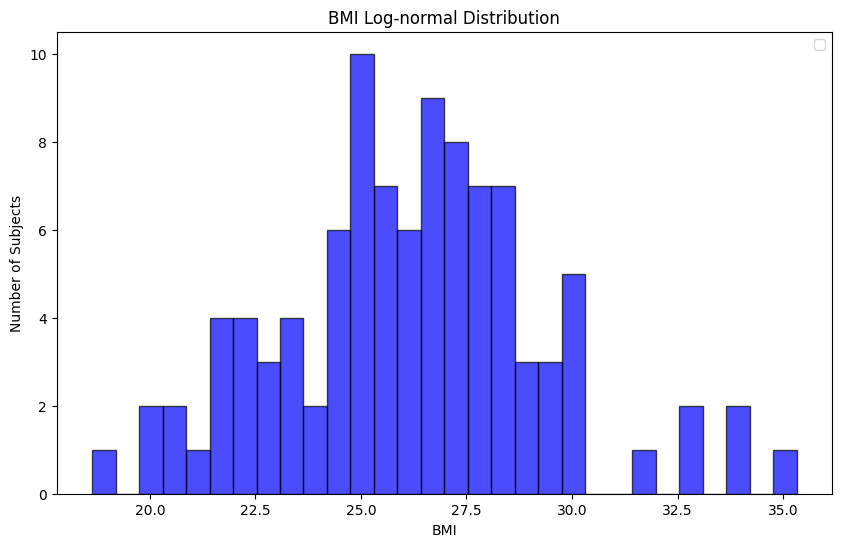

In [3]:
import matplotlib.pyplot as plt
# Now we can create a histogram of this distribution

plt.figure(figsize=(10, 6))
plt.hist(data['BMI'], bins=30, alpha=0.7, color='blue', edgecolor='black')

# Add labels and legend
plt.xlabel('BMI')
plt.ylabel('Number of Subjects')
plt.title('BMI Log-normal Distribution')
plt.legend()

# Show the histogram
plt.show()

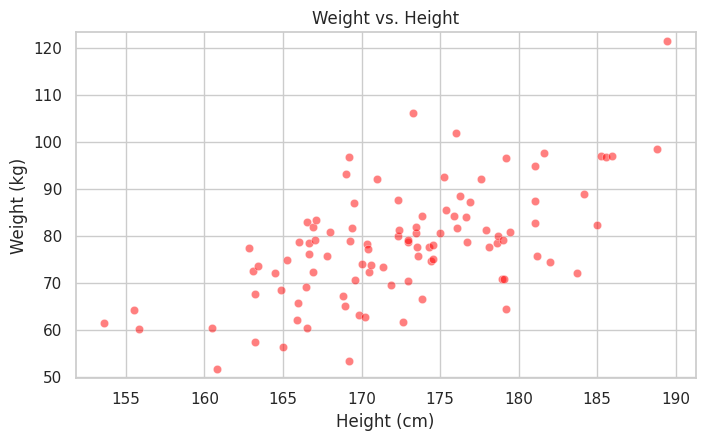

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4.5))
sns.set(style="whitegrid")
sns.scatterplot(x='Height', y='Weight', data=data, color='red', alpha=0.5)
plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.ylim(data['Weight'].min()-2, data['Weight'].max()+2)
plt.show()

Este enfoque matemático proporciona una base para examinar tendencias y patrones en datos observados, permitiéndonos inferir relaciones y, potencialmente, causalidades. En el caso de la relación entre peso y altura, el modelo podría ser tan simple como una ecuación lineal que asocia ambas variables, o podría ser más complejo, incorporando más factores y variables intermedias que afectan esta relación.

La clave de un modelo matemático es su universalidad; el mismo concepto se aplica en campos que van desde la física hasta la economía, cada uno con sus propios tipos de datos y relaciones únicas. En cada contexto, los modelos matemáticos son fundamentales para convertir teorías y observaciones en entendimiento cuantitativo, proporcionando un lenguaje común para describir fenómenos observados y para hacer predicciones confiables sobre eventos futuros o resultados no observados.

## Modelos Como Ecuaciones

Los modelos matemáticos son herramientas clave en estadística para entender cómo se relacionan dos o más variables. Estos modelos, representados comúnmente por ecuaciones, simplifican la complejidad de los datos reales y nos permiten hacer predicciones. Tomemos, por ejemplo, la relación entre el peso y la altura de una persona. A partir de datos recogidos, una línea ajustada nos da una ecuación que puede predecir el peso con solo conocer la altura.


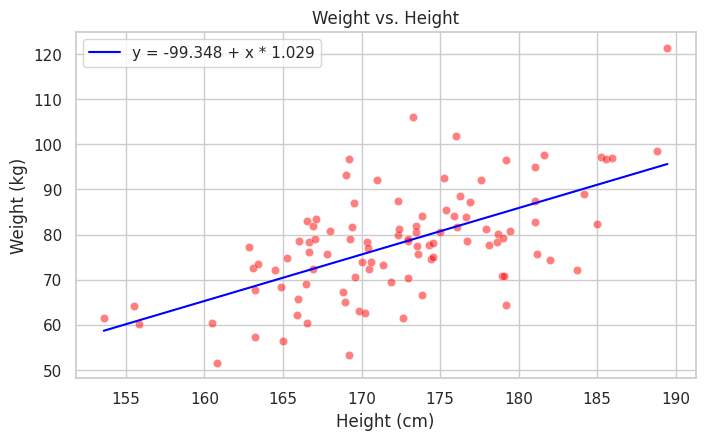

In [6]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(8, 4.5))
model = LinearRegression()
model.fit(data[['Height']], data['Weight'])
weight_pred = model.predict(data[['Height']])

sns.scatterplot(x='Height', y='Weight', data=data, color='red', alpha=0.5)
sns.lineplot(x=data['Height'], y=weight_pred, color='blue', label=f'y = {model.intercept_:.3f} + x * {model.coef_[0]:.3f}')
plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

En la práctica, si tenemos la ecuación que define la línea, y queremos estimar el peso para alguien de 175 cm de altura, simplemente sustituimos la x por 175. El modelo nos dará entonces una predicción de peso de 81 kilogramos.


/home/luisca1985/projects/github_luisca1985/mathematical_model_article/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted weight: 80.72067410777534


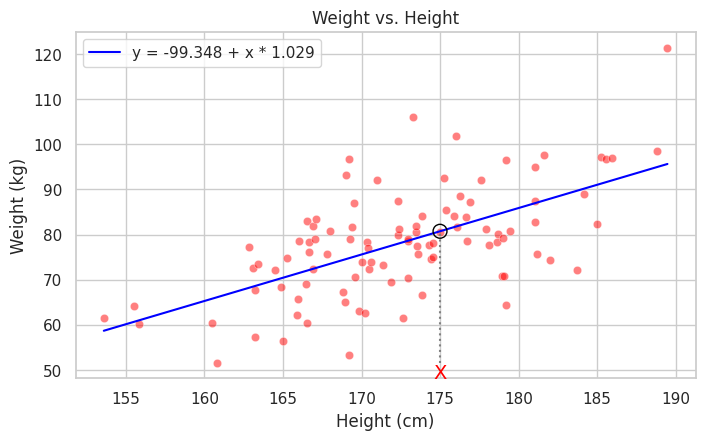

In [7]:
plt.figure(figsize=(8, 4.5))
sns.scatterplot(x='Height', y='Weight', data=data, color='red', alpha=0.5)
sns.lineplot(x=data['Height'], y=weight_pred, color='blue', label=f'y = {model.intercept_:.3f} + x * {model.coef_[0]:.3f}')

height_target = 175
weight_min = data['Weight'].min()
predicted_weight= model.predict([[height_target]])[0]
print('Predicted weight:', predicted_weight)
plt.scatter(height_target, predicted_weight, color='none', s=100, edgecolor='black', zorder=5)

plt.plot([height_target, height_target], [weight_min, predicted_weight], color='gray', linestyle=':')
plt.text(height_target, weight_min-3.5, 'X', fontsize=14, color='red', ha='center')

plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Sin embargo, es crucial recordar que estos modelos proporcionan aproximaciones. Las diferencias entre los datos reales y las predicciones, ilustradas con las líneas punteadas, subrayan las limitaciones de estas estimaciones.

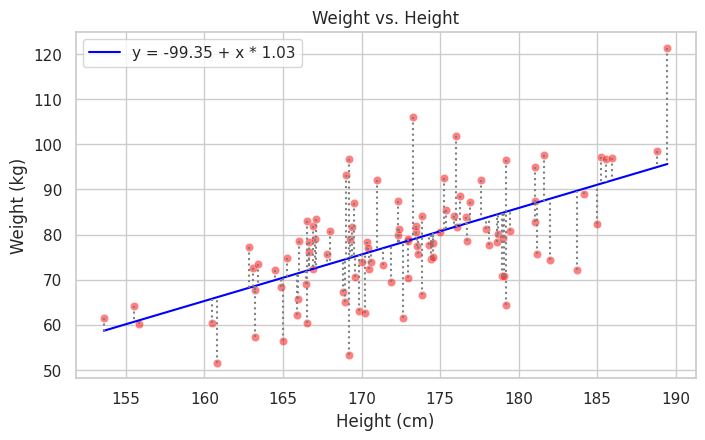

In [8]:
plt.figure(figsize=(8, 4.5))
sns.scatterplot(x='Height', y='Weight', data=data, color='red', alpha=0.5)
sns.lineplot(x=data['Height'], y=weight_pred, color='blue', label=f'y = {model.intercept_:.2f} + x * {model.coef_[0]:.2f}')
for i in range(n):
    plt.plot([data['Height'][i], data['Height'][i]], [data['Weight'][i], weight_pred[i]], color='gray', linestyle=':')
plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Por tanto, los modelos matemáticos, aunque potentes, son aproximaciones que nos ayudan a interpretar y anticipar tendencias dentro de un margen de error. Su belleza radica en su capacidad para ofrecernos una comprensión general y predictiva a partir de la observación de patrones en los datos existentes, siempre teniendo en cuenta que la realidad puede ser más compleja y matizada que lo que cualquier modelo puede capturar.

## Validez de los Modelos

En el terreno de la estadística, determinar la validez de un modelo es un paso crítico para cualquier análisis de datos. La regresión lineal, por ejemplo, es una herramienta que permite estimar la relación entre una variable dependiente y una o varias variables independientes. Pero saber que una relación existe no es suficiente; necesitamos cuantificar qué tan bien nuestro modelo se ajusta a los datos observados. Aquí es donde entran técnicas como las pruebas t, ANOVAs y pruebas F. Estas pruebas estadísticas proporcionan medidas cuantitativas de la fuerza y la significancia de la relación que nuestro modelo intenta capturar.

Tomemos la regresión lineal: después de ajustar una línea a un conjunto de datos, necesitamos evaluar la precisión de esta línea. Una prueba t puede decirnos si la pendiente de esta línea es significativamente diferente de cero, lo que indicaría una relación significativa entre las variables. ANOVAs y pruebas F se llevan a cabo para comparar modelos y determinar si la inclusión de más variables mejora significativamente el ajuste del modelo.

Estas técnicas no son solo ejercicios matemáticos; son esenciales para asegurar que las decisiones basadas en modelos estadísticos sean sólidas y confiables. Un modelo bien ajustado puede revelar patrones y tendencias que de otro modo podrían pasar desapercibidos, mientras que un modelo pobremente ajustado podría llevar a conclusiones erróneas.

La evaluación de modelos mediante estas pruebas es indispensable en la ciencia de datos moderna. Permite a los estadísticos y científicos de datos validar sus modelos y, a su vez, respaldar las decisiones estratégicas basadas en estos análisis. Este proceso de validación es una piedra angular en la construcción de modelos que no solo describan los datos históricos, sino que también sirvan como fundamentos confiables para la predicción y la toma de decisiones.

## Modelos No Lineales

En el análisis estadístico, es fundamental reconocer que no todas las relaciones entre variables pueden ser representadas por líneas rectas. Más allá de los modelos lineales, hay situaciones que requieren de enfoques no lineales para capturar la naturaleza de la relación. Por ejemplo, en la relación entre la edad y la altura, un modelo no lineal puede describir cómo la altura de una persona aumenta durante la infancia y adolescencia y cómo se estabiliza al alcanzar la adultez.

Un posible modelo no lineal es una curva sigmoide que refleja cómo la altura se incrementa con la edad hasta un punto de inflexión, después del cual el crecimiento se detiene. Este tipo de modelo es esencial para entender patrones intrincados en los datos, como la desaceleración del crecimiento en altura, que no se manifiestan de manera lineal.

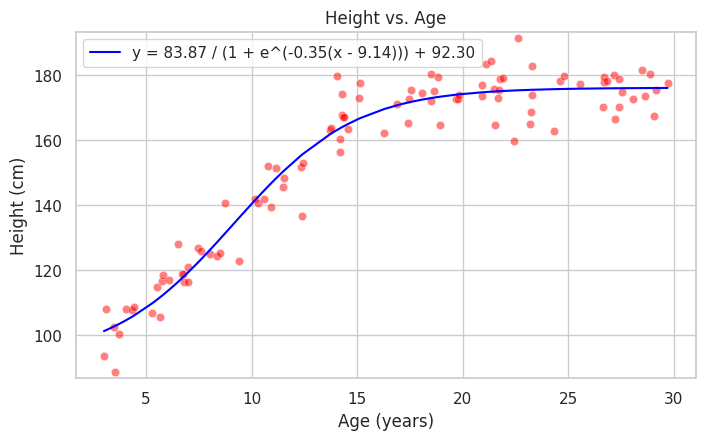

In [9]:
from scipy.optimize import curve_fit

# https://en.wikipedia.org/wiki/Human_height
# https://www.researchgate.net/figure/Human-growth-as-a-function-of-age-This-chart-developed-by-the-Center-of-Human-Health_fig1_7273759

def get_height(age):
    if age < 15:
        return 95 + (170 - 95) / (15 - 3) * (age - 3)
    elif age < 20:
        return 170 + (175 - 170) / (20 - 15) * (age - 15)
    else:
        return 175

def get_height_std_dev(age):
    if age < 15:
        return 5 + (7.5 - 5) / (15 - 3) * (age - 3)
    else:
        return 7.5

age_min=3
age_max=30

np.random.seed(1)
age = np.random.uniform(age_min, age_max, n)

height_2 = [get_height(x) + np.random.normal(0, get_height_std_dev(x)) for x in age]
data_2 = pd.DataFrame({'Age': age, 'Height': height_2})
data_2.sort_values(by=['Age'],inplace=True,ignore_index=True)

def sigmoid(x, L, x0, k, b):
    y = L / (1 + np.exp(-k * (x - x0))) + b
    return y

popt, pcov = curve_fit(sigmoid, data_2['Age'], data_2['Height'], p0=[200, 10, 0.1, 100], maxfev=10000)

height_pred = sigmoid(data_2['Age'], *popt)

sigmoid_label = f'y = {popt[0]:.2f} / (1 + e^(-{popt[2]:.2f}(x - {popt[1]:.2f}))) + {popt[3]:.2f}'
plt.figure(figsize=(8, 4.5))
sns.scatterplot(x='Age', y='Height', data=data_2, color='red', alpha=0.5)
sns.lineplot(x=data_2['Age'], y=height_pred, color='blue', label=sigmoid_label)
plt.title('Height vs. Age')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.ylim(data_2['Height'].min()-2, data_2['Height'].max()+2)
plt.show()

Esta comprensión es crucial cuando se contrastan diferentes tipos de modelos en estadística. Mientras que un modelo lineal puede ofrecer una vista simplificada, los modelos no lineales permiten una mejor adaptación a la realidad de los datos.

La habilidad para elegir el modelo correcto en función de la naturaleza de los datos es una habilidad estadística crucial. Los modelos no lineales amplían nuestro repertorio, permitiéndonos descubrir y representar relaciones más complejas.

## Modelos Multidimensionales

La facultad de los modelos matemáticos para integrar y analizar múltiples variables es un testimonio de su versatilidad y capacidad para reflejar la complejidad del mundo real. Estos modelos no se restringen a simples relaciones unidimensionales; pueden abarcar una variedad de factores interconectados, proporcionando una comprensión más profunda y detallada de los fenómenos estudiados.

Por ejemplo, el peso de un individuo puede depender de una multiplicidad de factores, no siendo suficiente considerar únicamente la altura para hacer una estimación precisa. Al incorporar el Índice de Masa Corporal (BMI) junto con la altura, se enriquece el modelo, lo que nos permite comprender cómo se relacionan ambas variables con el peso. Este modelo más sofisticado tiene en cuenta la distribución de la masa corporal, ofreciendo una visión más completa que si solo se midiera la altura.

La imagen ilustra esta relación, no solo podemos ver cómo el peso aumenta con la altura, sino también cómo el BMI influye en este peso. Por ejemplo, una persona de una altura determinada podría tener un peso diferente dependiendo de su BMI, lo cual sería imperceptible en un modelo que considere únicamente la altura.

En el campo de la ciencia de datos, estos modelos multifactoriales son particularmente valiosos. Permiten a los científicos de datos y analistas construir algoritmos predictivos que tomen en cuenta la interacción entre varias variables para ofrecer predicciones más precisas y fiables. Así, los modelos matemáticos actúan como herramientas esenciales en el proceso de toma de decisiones.

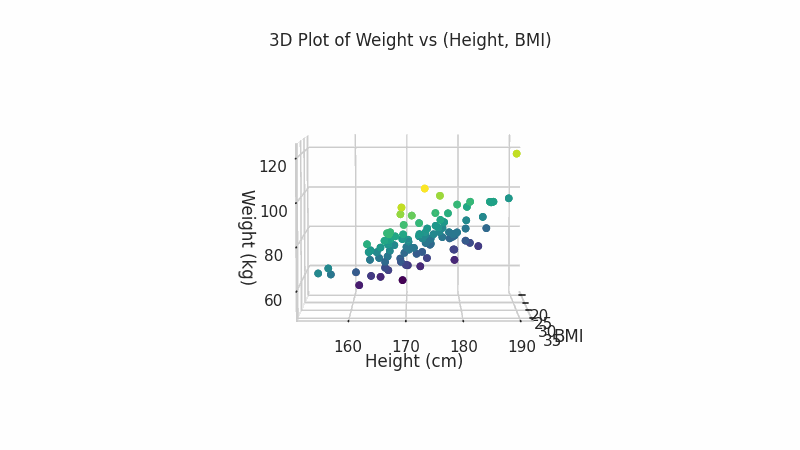

In [12]:
from matplotlib.animation import FuncAnimation
from IPython.display import Image

fig = plt.figure(figsize=(8, 4.5))
ax = fig.add_subplot(111, projection='3d')

def init():
  scatter = ax.scatter(data['BMI'], data['Height'], data['Weight'], c=data['BMI'], cmap='viridis', alpha=0.8)
  ax.set_xlabel('BMI')
  ax.set_ylabel('Height (cm)')
  ax.set_zlabel('Weight (kg)')
  plt.title('3D Plot of Weight vs (Height, BMI)')
  return fig,

def update(azim):
  ax.view_init(elev=5, azim=azim, roll=0)
  return fig,

azim_frames = np.r_[0:90:1, 90:0:-1].tolist()

ani = FuncAnimation(fig, update, init_func=init, frames=azim_frames, interval=50, blit=True)
gif_path = "weight_height_bmi_3d.gif"
ani.save(gif_path, writer='pillow')
plt.close()
Image(open(gif_path,'rb').read())

## Conclusiones

Los modelos matemáticos en estadística son más que herramientas de cálculo: son el puente entre la teoría y la práctica en la comprensión de complejas interacciones entre variables. Con ellos, no solo describimos el mundo de los datos, sino que también predecimos y explicamos fenómenos. La capacidad de estos modelos para abarcar desde relaciones simples hasta interacciones multidimensionales es lo que los hace indispensables en la ciencia de datos. Al final, estos modelos nos ayudan a tomar decisiones más adecuadas, basadas en un análisis riguroso y una comprensión profunda de los datos.